<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [3]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_wine.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [5]:
# Выполним преобразование целевой переменной
df_wine.loc[:, 'quality'] = (df_wine.loc[:, 'quality'] > 5).astype(int)

In [6]:
X, y = df_wine.iloc[:,:-1].values, df_wine.iloc[:,-1].values

In [7]:
from sklearn.cross_validation import train_test_split
# Разделим выборку на обучающую и тестовую

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
X_train.shape

(1279, 11)

In [10]:
X_test.shape

(320, 11)

#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [11]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

In [12]:
scores = []
for d in range(1,20):
    model = DecisionTreeClassifier(max_depth=d)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean())
print scores

[0.69463845225877319, 0.74924527809287167, 0.77417554631280128, 0.7885809941362526, 0.78128950227167693, 0.77314621857313481, 0.77224087578098266, 0.74416197026713959, 0.73889815865127806, 0.74175507001086316, 0.74142362724091782, 0.75003627480989332, 0.74074999849955281, 0.74047388921898727, 0.74314007274167704, 0.74233904403512252, 0.75329268622049372, 0.73973410576351761, 0.74318613946956191]


In [13]:
max(scores)

0.7885809941362526

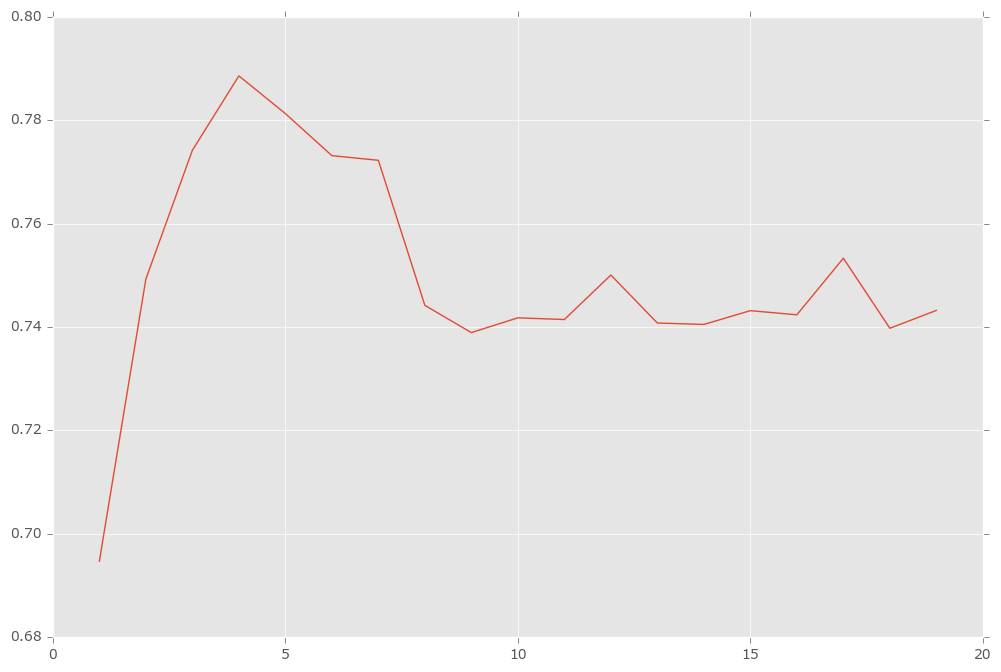

In [14]:
plt.plot(range(1,20), scores)

In [ ]:
# Лучшее качество достигается при глубине дерева 4 (при scoring='roc_auc')

In [ ]:
# Возьмем метрику accuracy

In [15]:
scores = []
for d in range(1,20):
    model = DecisionTreeClassifier(max_depth=d)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean())
#print scores

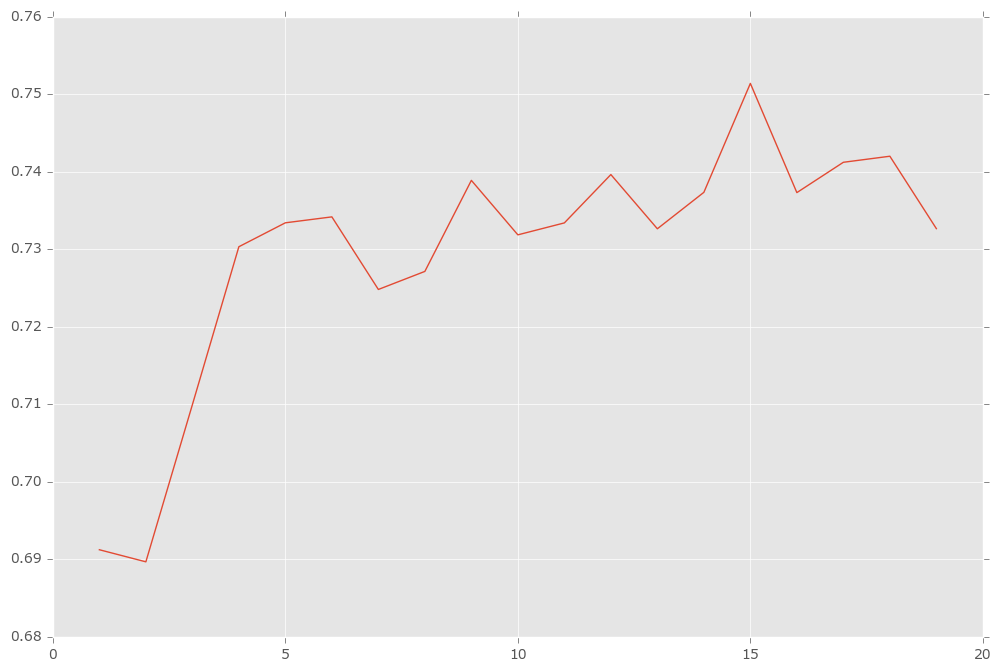

In [16]:
plt.plot(range(1,20), scores)

In [ ]:
# Если выбрать меру качества accuracy, то выбрать оптимальную глубину не так просто.

In [ ]:
# Воспользуемся validation_curve 
# В результате возвращаются мера качества как на тестовой части каждого из фолдов, так и на обучающей части

In [21]:
model = DecisionTreeClassifier(random_state=123) 
train_scores, test_scores = validation_curve(model, X_train, y_train, 'max_depth', 
                                            range(1, 20), n_jobs=-1, cv=5, scoring='roc_auc')

In [22]:
train_mean = train_scores.mean(axis=1) # по строкам
test_mean = test_scores.mean(axis=1) 
train_std = train_scores.std(axis=1) 
test_std = test_scores.std(axis=1)

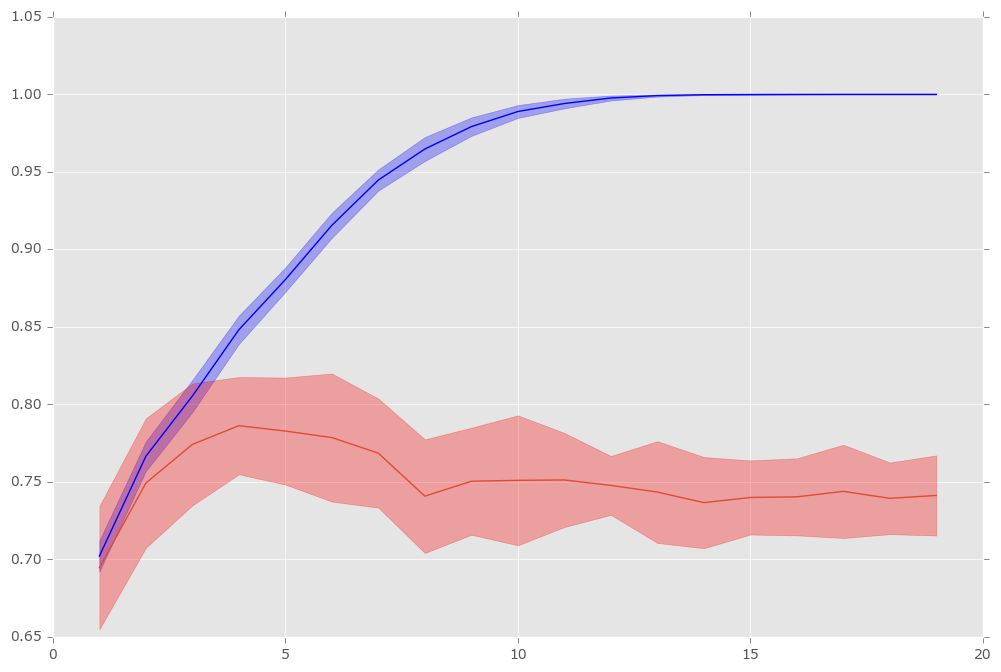

In [23]:
d = range(1,20) 

plt.plot(d, train_mean, color='b') 
plt.plot(d, test_mean) 

plt.fill_between(d, train_mean-train_std, train_mean+train_std, color='b', alpha=0.3) 
plt.fill_between(d, test_mean-test_std, test_mean+test_std, color='r', alpha=0.3)

In [ ]:
# Виден тот же самый пик при глубине 4

In [ ]:
# Возьмем метрику accuracy

In [24]:
model = DecisionTreeClassifier(random_state=123) 
train_scores, test_scores = validation_curve(model, X_train, y_train, 'max_depth', 
                                            range(1, 20), n_jobs=-1, cv=5, scoring='accuracy')

In [25]:
train_mean = train_scores.mean(axis=1) # по строкам
test_mean = test_scores.mean(axis=1) 
train_std = train_scores.std(axis=1) 
test_std = test_scores.std(axis=1)

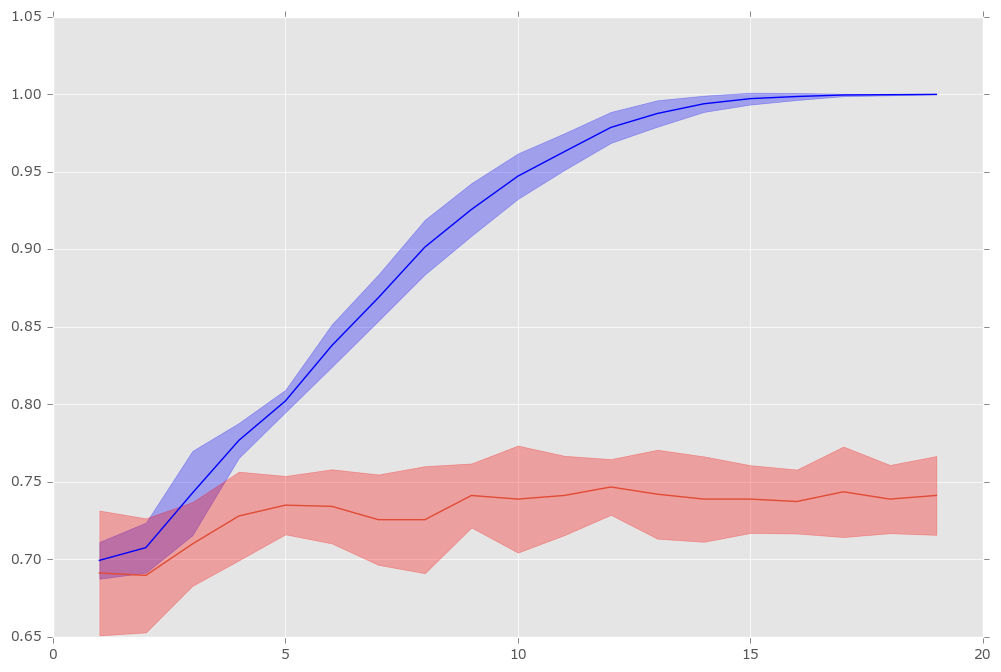

In [26]:
d = range(1,20) 

plt.plot(d, train_mean, color='b') 
plt.plot(d, test_mean) 

plt.fill_between(d, train_mean-train_std, train_mean+train_std, color='b', alpha=0.3) 
plt.fill_between(d, test_mean-test_std, test_mean+test_std, color='r', alpha=0.3)

In [41]:
# На той глубине, где accuracy был наибольший (около 14) ошибка на трейновой части минимальная, есть очень сильное переобучение. 

In [ ]:
# Вывод: Основываясь на том, что при метрике roc-auc виден пик при глубине 4, и на том, что переобучение по 
# accuracy не такое сильное при max_depth=4, а качество будет лучше, чем в окрестности, то выберем глубину 4

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [27]:
model = DecisionTreeClassifier(random_state=123, max_depth=4) 
model.fit(X_train, y_train)

importances = model.feature_importances_

In [28]:
importance_dict = dict(zip(df_wine.columns, importances))
importance_dict

{'alcohol': 0.54335556010637265,
 'chlorides': 0.0,
 'citric acid': 0.0,
 'density': 0.019583112132573518,
 'fixed acidity': 0.0,
 'free sulfur dioxide': 0.0,
 'pH': 0.033394997923790137,
 'residual sugar': 0.011739122775680117,
 'sulphates': 0.2180038443980869,
 'total sulfur dioxide': 0.10214649062609693,
 'volatile acidity': 0.071776872037399769}

In [29]:
#sorted(importance_dict.values())[::-1]
sorted(importance_dict, key=importance_dict.get)[::-1]

['alcohol',
 'sulphates',
 'total sulfur dioxide',
 'volatile acidity',
 'pH',
 'density',
 'residual sugar',
 'free sulfur dioxide',
 'citric acid',
 'fixed acidity',
 'chlorides']

In [ ]:
# Отсортировали признаки по важности. Получили, что самый важный признак alcohol, наименее важные признаки:
# free sulfur dioxide, citric acid, fixed acidity, chlorides

#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

In [30]:
# Предсказания на тестовой выборке
predictions_test = model.predict(X_test)
probability_predictions_test = model.predict_proba(X_test)

In [31]:
# Предсказания на обучающей выборке
predictions_train = model.predict(X_train)
probability_predictions_train = model.predict_proba(X_train)

In [32]:
from sklearn import metrics

In [40]:
# Для тестовой выборки, с учетом вероятности 1 класса
fpr, tpr, thresholds = metrics.roc_curve(y_test, probability_predictions_test[:,1], pos_label=1)

Populating the interactive namespace from numpy and matplotlib


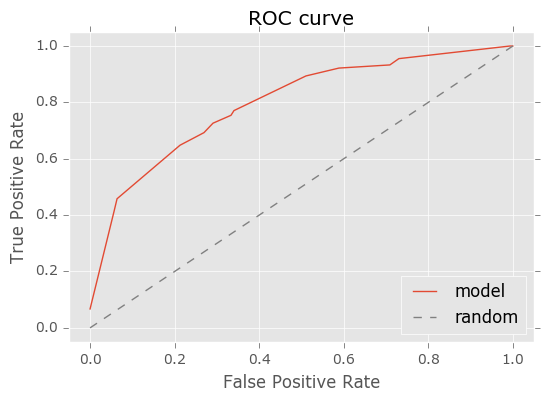

In [41]:
%pylab inline
pylab.plot(fpr, tpr, label = 'model') 
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random') 
pylab.xlim([-0.05, 1.05]) 
pylab.ylim([-0.05, 1.05]) 
pylab.xlabel('False Positive Rate') 
pylab.ylabel('True Positive Rate') 
pylab.title('ROC curve') 
pylab.legend(loc = "lower right")

In [44]:
# Для обучающей выборки, с учетом вероятности 0 класса
fpr, tpr, thresholds = metrics.roc_curve(y_train, probability_predictions_train[:,0], pos_label=0)

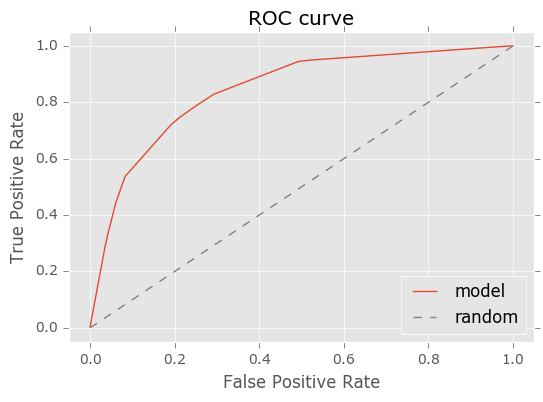

In [45]:
pylab.plot(fpr, tpr, label = 'model') 
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random') 
pylab.xlim([-0.05, 1.05]) 
pylab.ylim([-0.05, 1.05]) 
pylab.xlabel('False Positive Rate') 
pylab.ylabel('True Positive Rate') 
pylab.title('ROC curve') 
pylab.legend(loc = "lower right")

In [46]:
from sklearn import metrics
from sklearn.preprocessing import Binarizer
# Посчитаем другие меры качества при пороге 0.5

In [47]:
binarizer = Binarizer(threshold=0.5).fit(probability_predictions_test)  # fit does nothing

In [48]:
res = binarizer.transform(probability_predictions_test)

In [51]:
#metrics.accuracy_score(y_test, res[:,1]) # accuracy_score для тестовой выборки

0.71562499999999996

In [52]:
#metrics.precision_score(y_test, res[:,1]) # precision для 1 класса 

0.74175824175824179

In [53]:
binarizer = Binarizer(threshold=0.5).fit_transform(probability_predictions_test)

In [62]:
metrics.accuracy_score(y_test, binarizer[:,1]) # accuracy_score для тестовой выборки

0.71562499999999996

In [65]:
metrics.precision_score(y_test, binarizer[:,1], pos_label=1) # precision для 0 класса 

0.74175824175824179

In [66]:
metrics.precision_score(y_test, binarizer[:,1], pos_label=0) # precision для 1 класса

0.6811594202898551

In [70]:
metrics.recall_score(y_test, binarizer[:,1], pos_label=1) # recall для 1 класса

0.75418994413407825

In [71]:
metrics.recall_score(y_test, binarizer[:,1], pos_label=0) # recall для 0 класса 

0.66666666666666663

In [72]:
metrics.f1_score(y_test, binarizer[:,1], pos_label=1) # f1 для 1 класса 

0.74792243767313016

In [74]:
metrics.f1_score(y_test, binarizer[:,1], pos_label=0) # f1 для 0 класса 

0.6738351254480287

In [75]:
print metrics.classification_report(y_test, binarizer[:,1])

             precision    recall  f1-score   support

          0       0.68      0.67      0.67       141
          1       0.74      0.75      0.75       179

avg / total       0.72      0.72      0.72       320



In [76]:
metrics.roc_auc_score(y_test, binarizer[:,1])

0.7104283054003725

In [77]:
metrics.average_precision_score(y_test, binarizer[:,1])

0.81672409294616011

In [142]:
#metrics.log_loss(y_test, binarizer[:,1])

In [143]:
#matrix = metrics.confusion_matrix(y_test, binarizer[:,1])
#print (matrix)

In [ ]:
# Видно, что показатели метрик достаточно высокие. Можно сделать вывод о хорошем качестве классификации

#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно звять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [80]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [81]:
simple_model = DecisionTreeClassifier(random_state=123, max_depth=4) 

In [92]:
simple_model.fit(X_train, y_train)
simple_model_lables = simple_model.predict_proba(X_test)
#simple_model_lables

In [95]:
metrics.roc_auc_score(y_test, simple_model_lables[:,1])

0.79717896905582619

In [96]:
#Модель случайного леса
scores_train = []
scores_test = []

for d in range(10, 100, 10):
    
    model = RandomForestClassifier(n_estimators=d, max_depth=4, random_state=125)
    scores_train.append(cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean())
    model.fit(X_train, y_train)
    labels = model.predict_proba(X_test)
    res_lables = metrics.roc_auc_score(y_test, labels[:,1])
    scores_test.append(res_lables)

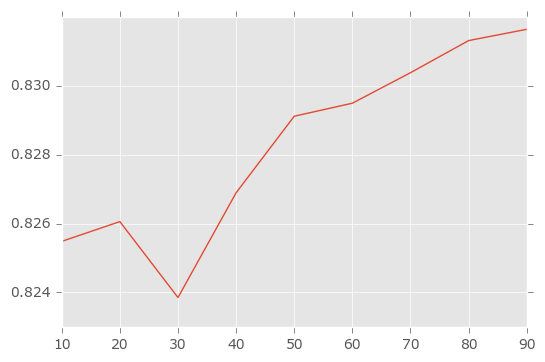

In [98]:
plt.plot(range(10, 100, 10), scores_train)
# Качество на обучающей выборке немного падает с 20 до 30, далее возрастает

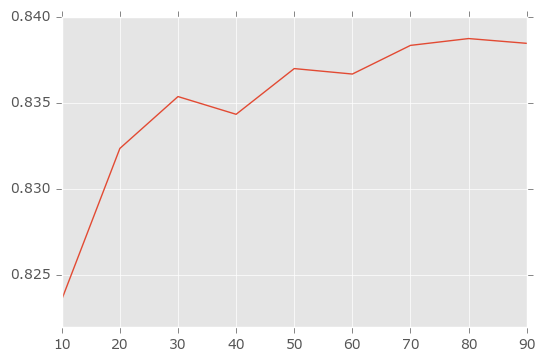

In [99]:
plt.plot(range(10, 100, 10), scores_test)
# Качество на тестовой сильно возрастает с 10 до 30, затем, в основном, тоже возрастает, но не так резко. 
# Максимальное значение - при 70-90 деревьев, около 0.838

In [100]:
# Бэггинг 
scores_test = []
scores_train = []

for d in range(10, 100, 10):
    
    model = BaggingClassifier(n_estimators=d, random_state=123)
    scores_train.append(cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean())
    model.fit(X_train, y_train)
    labels = model.predict_proba(X_test)
    res_lables = metrics.roc_auc_score(y_test, labels[:,1])
    scores_test.append(res_lables)

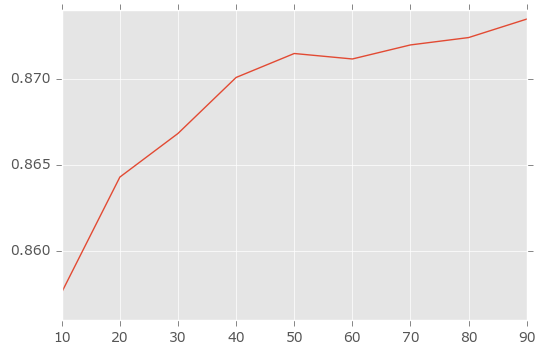

In [101]:
plt.plot(range(10, 100, 10), scores_train)
# Качество на обучающей резко возрастает с 10 до 50 деревьев, затем, в основном, тоже возрастает, но не так резко

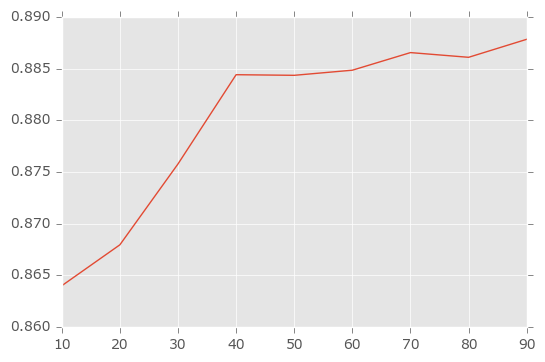

In [102]:
plt.plot(range(10, 100, 10), scores_test)
# Качество на тестовой сильно возрастает с 10 до 340, затем, в основном, тоже возрастает, но не так резко. 
# Максимальное значение - при 90 деревьев, около 0.887

In [ ]:
# Сильного переобучения не видно на графиках для моделей Бэггинга и Случайного леса. При рассматриваемом количестве деревьев обе модели 
# показывают лучший результат по сравнению с простым деревом решений. В модели бэггинга высокое качество достигается при меньшем кол-ве 
# деревьев, чем в модели Случайного леса

####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [103]:
from sklearn import grid_search

In [104]:
clf = RandomForestClassifier(random_state=123)

In [105]:
clf.get_params().keys()

['warm_start',
 'oob_score',
 'n_jobs',
 'verbose',
 'max_leaf_nodes',
 'bootstrap',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'max_features',
 'max_depth',
 'class_weight']

In [109]:
param_grid = {
    'max_depth' : range(1, 20),
    'n_estimators' : range(1, 100, 10),   
}

In [112]:
from sklearn import cross_validation
#cv = cross_validation.StratifiedShuffleSplit(y_train, n_iter = 10, test_size = 0.2, random_state = 0)

In [124]:
grid_cv = grid_search.GridSearchCV(clf, param_grid, scoring='roc_auc')

In [125]:
%%time
grid_cv.fit(X_train, y_train)

CPU times: user 1min 21s, sys: 759 ms, total: 1min 21s
Wall time: 1min 21s


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [126]:
grid_cv.best_estimator_
# Посмотрим, какая из моделей лучшая

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=91, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [127]:
print grid_cv.best_score_
print grid_cv.best_params_
# Параметры лучшей модели

0.863996813142
{'n_estimators': 91, 'max_depth': 15}


In [117]:
#grid_cv.grid_scores_[:10]

In [130]:
model = RandomForestClassifier(random_state=123, n_estimators=91, max_depth=15)

In [131]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=91, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [132]:
# Качество модели с оптимальными параметрами на контрольной выборке (roc_auc)
labels_proba = model.predict_proba(X_test)
score_proba = metrics.roc_auc_score(y_test, labels_proba[:,1])
score_proba

0.89187368754705021

In [133]:
# Качество модели с оптимальными параметрами на кросс-валидации (roc_auc)
score_train = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
score_train

0.8801792584190089

In [134]:
# Качество модели с оптимальными параметрами на кросс-валидации (accuracy)
labels = model.predict(X_test)
score = metrics.accuracy_score(y_test, labels)
score

0.80625000000000002

In [135]:
# Качество модели с оптимальными параметрами на кросс-валидации (accuracy)
score_train = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
score_train

0.81865998369192039

In [136]:
# Качество модели с оптимальными параметрами на кросс-валидации (precision)
labels = model.predict(X_test)
score = metrics.precision_score(y_test, labels)
score

0.81967213114754101

In [137]:
# Качество модели с оптимальными параметрами на кросс-валидации (precision)
score_train = cross_val_score(model, X_train, y_train, cv=5, scoring='precision').mean()
score_train

0.83061152624017076

In [138]:
# Качество модели с оптимальными параметрами на кросс-валидации (recall)
labels = model.predict(X_test)
score = metrics.recall_score(y_test, labels)
score

0.83798882681564246

In [139]:
# Качество модели с оптимальными параметрами на кросс-валидации (recall)
score_train = cross_val_score(model, X_train, y_train, cv=5, scoring='recall').mean()
score_train

0.82541394335511986

In [140]:
# Качество модели с оптимальными параметрами на кросс-валидации (f1)
labels = model.predict(X_test)
score = metrics.f1_score(y_test, labels)
score

0.82872928176795591

In [141]:
# Качество модели с оптимальными параметрами на кросс-валидации (f1)
score_train = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
score_train

0.82758629171571929

In [ ]:
# Показатели довольно высокие (при различных метриках) как при кросс-валидации, так и на контрольной выборке, также не наблюдается
# эффекта переобучения: качество на обучающей выборке не превосходит в значительной мере качества на тестовой выборке. 
# Вывод: полученная модель хорошего качества